In [1]:
import pandas as pd
import spacy
import umap.umap_ as umap
import numpy as np 
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

from ml_editor.data_processing import format_raw_df, get_split_by_author
from ml_editor.data_visualization import plot_embeddings

data_path = Path('../data/writers.csv')
df = pd.read_csv(data_path)
df = format_raw_df(df.copy())

train_author, test_author = get_split_by_author(df[df["is_question"]])

In [2]:
questions = train_author[train_author["is_question"]]
raw_text = questions["body_text"]

sent_labels = questions["AcceptedAnswerId"].notna()
sent_labels.value_counts()

True     2907
False    2769
Name: AcceptedAnswerId, dtype: int64

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=2**21)
bag_of_words = vectorizer.fit_transform(raw_text)
bag_of_words.shape

(5676, 27381)

In [6]:
umap_embedder = umap.UMAP()
umap_bow = umap_embedder.fit_transform(bag_of_words)

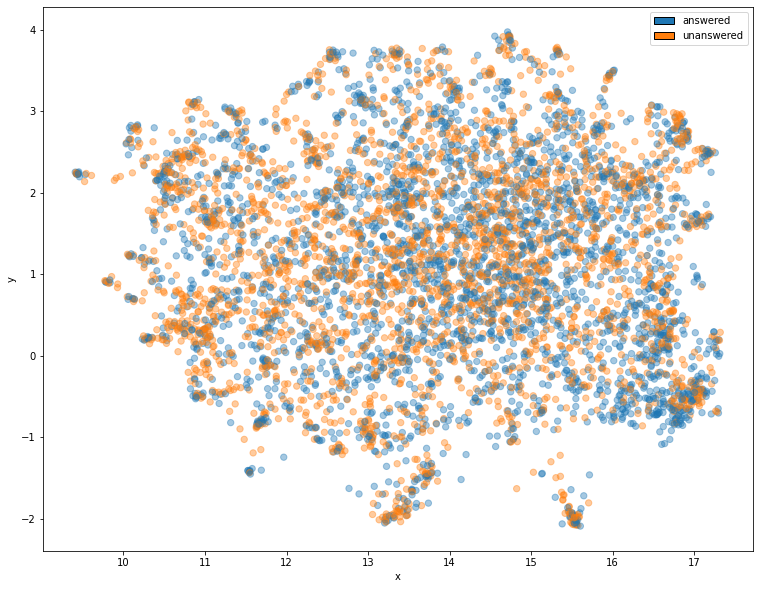

In [7]:
plot_embeddings(umap_bow, sent_labels)

In [3]:
nlp = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner", "textcat", "lemmatizer"])

In [4]:
spacy_emb = raw_text.apply(lambda x: nlp(x).vector)
embeddings = np.vstack(spacy_emb)

Id
3        [0.0027755788, 0.26540655, -0.31894958, -0.117...
5        [0.008882051, 0.18192096, -0.1840949, -0.01398...
7        [-0.09217071, 0.22204895, -0.08326078, -0.1327...
11       [-0.085969485, 0.24080445, -0.27225313, -0.034...
19       [0.07916348, 0.13554204, -0.18365902, 0.007070...
                               ...                        
42857    [-0.0072171167, 0.16729674, -0.19037707, -0.06...
42869    [0.010987374, 0.20875248, -0.1949703, -0.00795...
42875    [-0.02609968, 0.19876848, -0.12581682, -0.0483...
42879    [0.026160225, 0.23762052, -0.17524634, -0.0908...
42882    [-0.07661504, 0.082693286, -0.042522162, 0.014...
Name: body_text, Length: 5676, dtype: object

In [11]:
umap_embedder = umap.UMAP()
umap_emb = umap_embedder.fit_transform(embeddings)

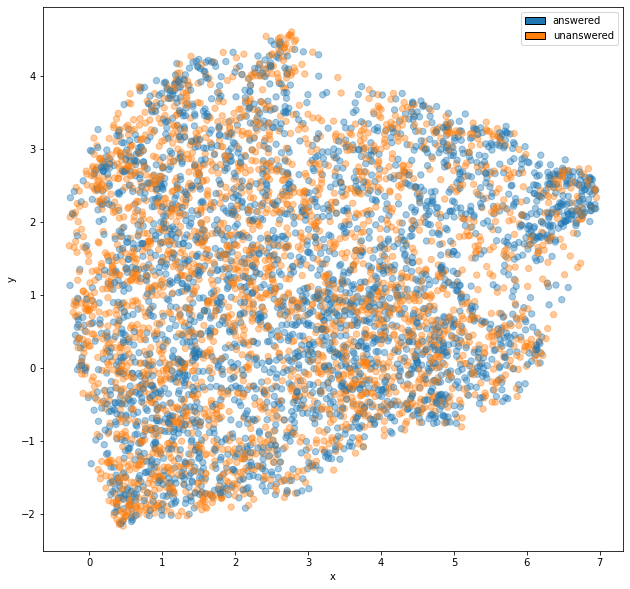

In [16]:
plot_embeddings(umap_emb, sent_labels)

In [17]:
umap_bow.shape

(5676, 2)